<a href="https://colab.research.google.com/github/ShambhabiMondal/Sarcasm-Detection/blob/main/sarcasm-main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: Sarcasm_Headlines_Dataset.json  
  inflating: Sarcasm_Headlines_Dataset_v2.json  


In [3]:
import numpy as np
import json 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, Conv1D, MaxPooling1D

In [4]:
# Reading data from the json file and separating them into sentences and labels

datastore = []
for line in open("/content/Sarcasm_Headlines_Dataset_v2.json", 'r'):
  datastore.append(json.loads(line))

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [13]:
# Hyperparameters

vocab_size = 10000
embedding_dim = 32
max_length = 100
trunc_type = 'post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
num_epochs = 35

In [14]:
# Splitting the dataset into train and test sets

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [15]:
# Fitting the Tokenizer on training data

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
total_words = len(tokenizer.word_index) + 1

In [16]:
# Creating padded sequences from train and test data

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [17]:
# Setting the model parameters

def create_model(total_words, max_length, embedding_dim):
    model = Sequential()

    model.add(Embedding(total_words, embedding_dim, input_length=max_length))
    model.add(Dropout(0.5))
    model.add(Conv1D(64, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=5))
    model.add(Bidirectional(LSTM(250)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [18]:
# Converting the train and test data to NumPy arrays for compatibility with newer version of TensorFlow

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [19]:
# Training the model

model = create_model(total_words, max_length, embedding_dim)
backend.set_value(model.optimizer.learning_rate, 0.001)

history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/35
625/625 - 24s - loss: 0.4771 - accuracy: 0.7511 - val_loss: 0.3352 - val_accuracy: 0.8543 - 24s/epoch - 39ms/step
Epoch 2/35
625/625 - 6s - loss: 0.2715 - accuracy: 0.8898 - val_loss: 0.3159 - val_accuracy: 0.8587 - 6s/epoch - 10ms/step
Epoch 3/35
625/625 - 6s - loss: 0.1899 - accuracy: 0.9275 - val_loss: 0.3412 - val_accuracy: 0.8529 - 6s/epoch - 10ms/step
Epoch 4/35
625/625 - 6s - loss: 0.1491 - accuracy: 0.9428 - val_loss: 0.3610 - val_accuracy: 0.8550 - 6s/epoch - 10ms/step
Epoch 5/35
625/625 - 6s - loss: 0.1141 - accuracy: 0.9568 - val_loss: 0.4120 - val_accuracy: 0.8564 - 6s/epoch - 10ms/step
Epoch 6/35
625/625 - 5s - loss: 0.0881 - accuracy: 0.9670 - val_loss: 0.4917 - val_accuracy: 0.8428 - 5s/epoch - 8ms/step
Epoch 7/35
625/625 - 5s - loss: 0.0709 - accuracy: 0.9740 - val_loss: 0.4865 - val_accuracy: 0.8491 - 5s/epoch - 8ms/step
Epoch 8/35
625/625 - 6s - loss: 0.0659 - accuracy: 0.9748 - val_loss: 0.5193 - val_accuracy: 0.8515 - 6s/epoch - 10ms/step
Epoch 9/35
625/6

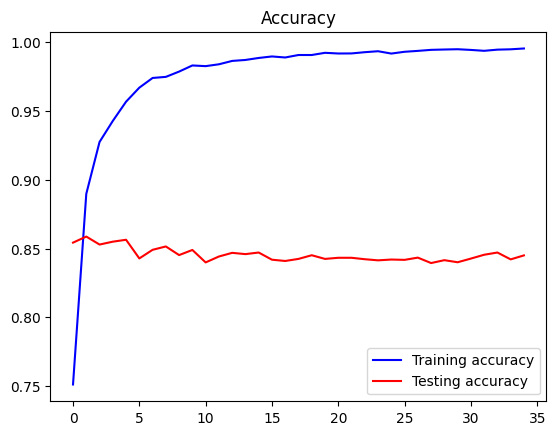

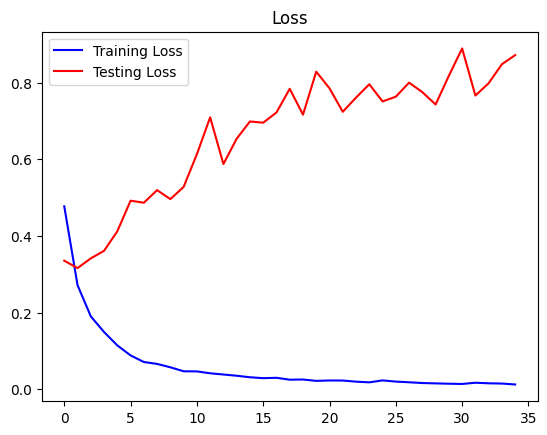

In [20]:
# Accuracy and loss plots for the model

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Testing accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Testing Loss')
plt.title('Loss')
plt.legend()

plt.show()